In [1]:
import jax
import tensorflow_probability.substrates.jax.bijectors as tfb
import tensorflow_probability.substrates.jax.distributions as tfd

import liesel.experimental.optim as opt
import liesel.model as lsl

We take a super simple Liesel model here

In [2]:
xval = 2.0 * jax.random.normal(jax.random.key(42), (10_000,)) + 3.0

In [3]:
m = lsl.Var.new_param(0.0, name="m")
s = lsl.Var.new_param(1.0, name="s")
s.transform(tfb.Exp())
x = lsl.Var.new_obs(
    xval,
    distribution=lsl.Dist(tfd.Normal, loc=m, scale=s),
    name="x",
)
p = lsl.Model([x])

In [4]:
engine = opt.QuickOptim(p).build_engine()

In [5]:
res = engine.fit()

Training loss: 21033.506, Validation loss: 21033.506:   2%|▏         | 21/1000 [00:00<00:19, 49.37it/s]


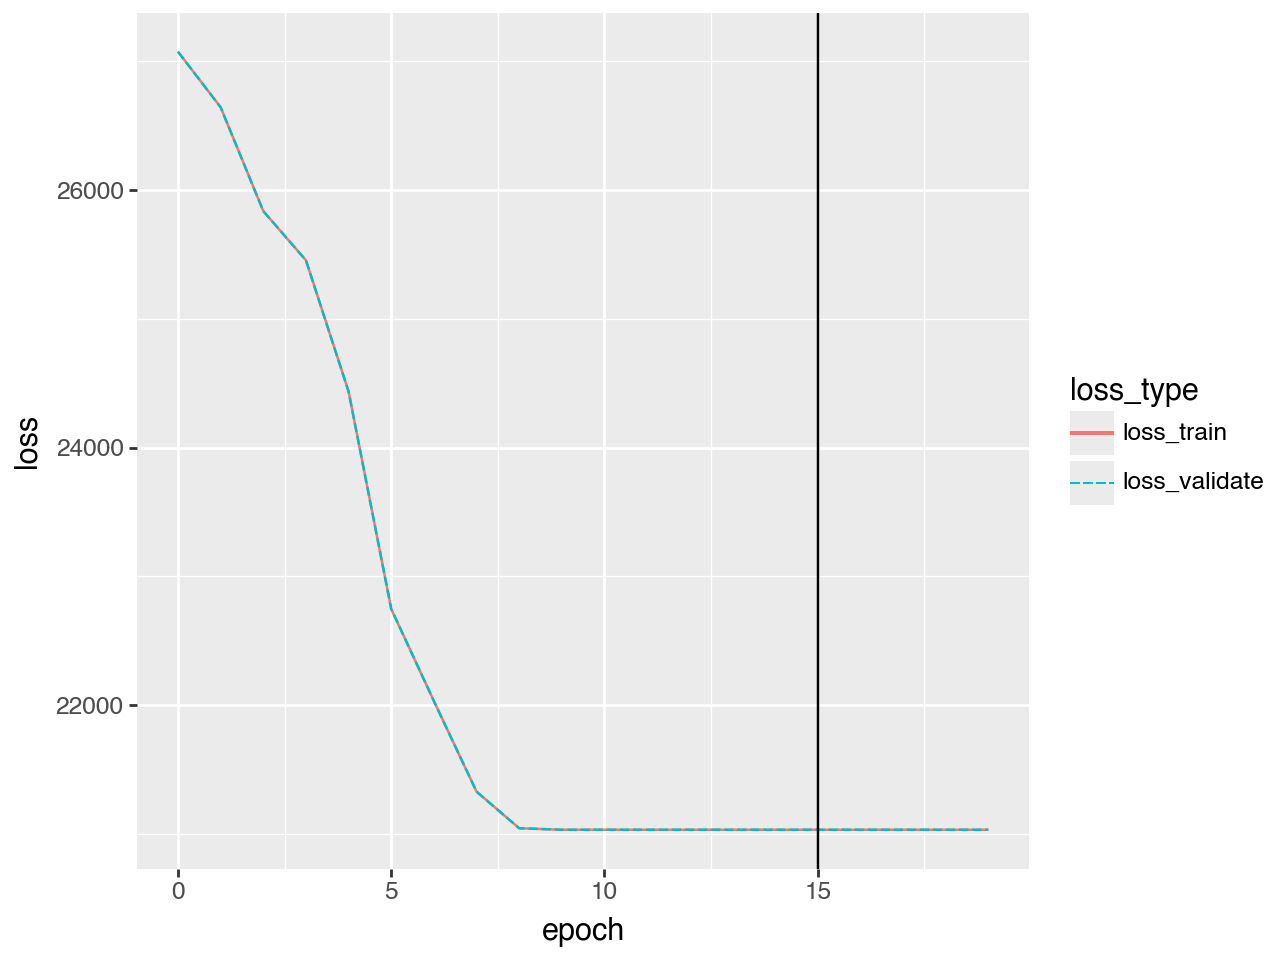

In [6]:
res.plot_loss()

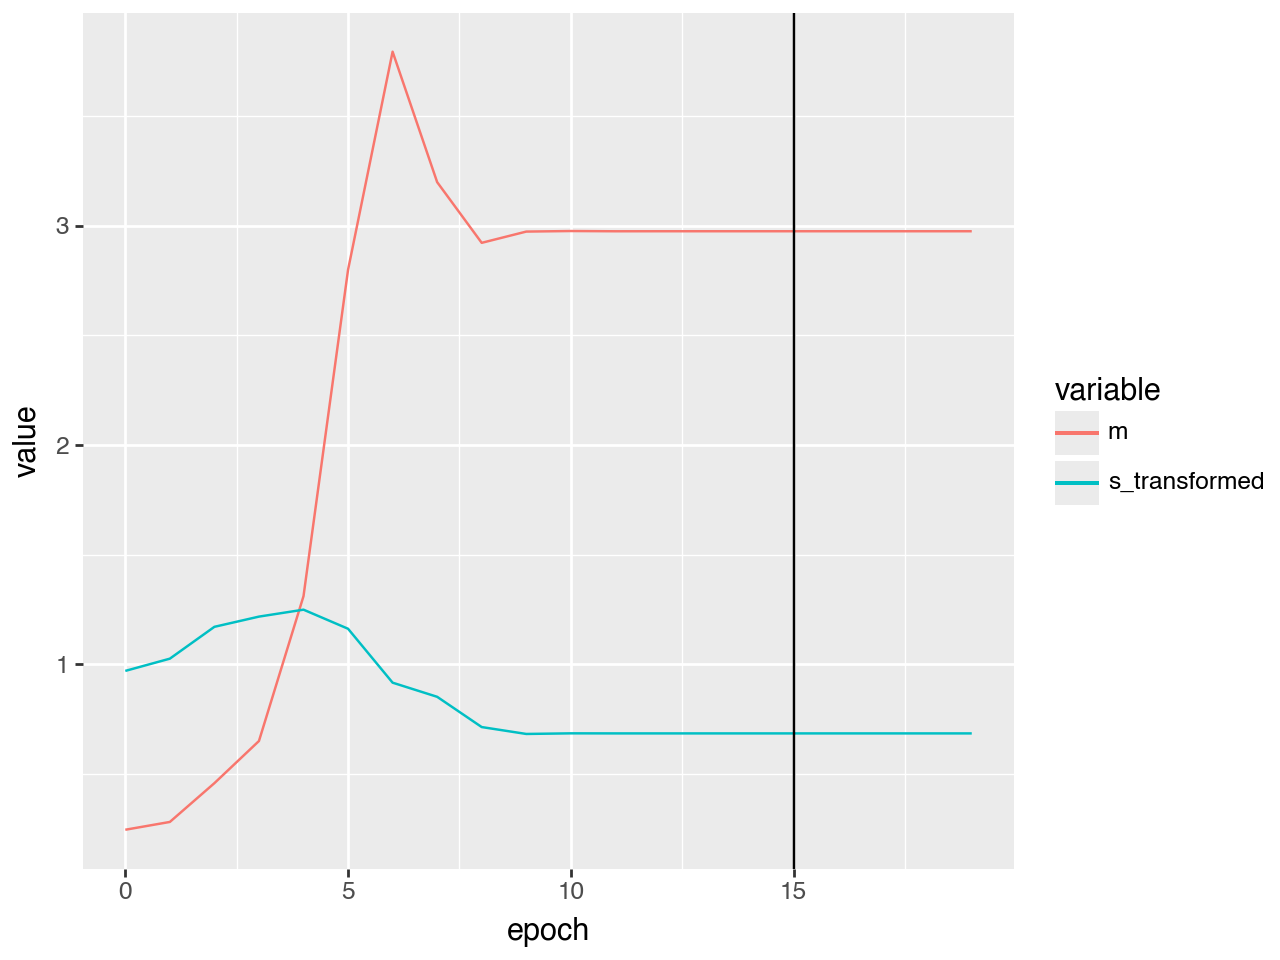

In [7]:
res.plot_param_history()

In [8]:
engine = opt.QuickOptim(p, loss="elbo_meanfield", batch_size=32).build_engine()

In [9]:
res = engine.fit()

Training loss: 21034.730, Validation loss: 21034.730:  10%|▉         | 99/1000 [00:00<00:06, 131.45it/s]


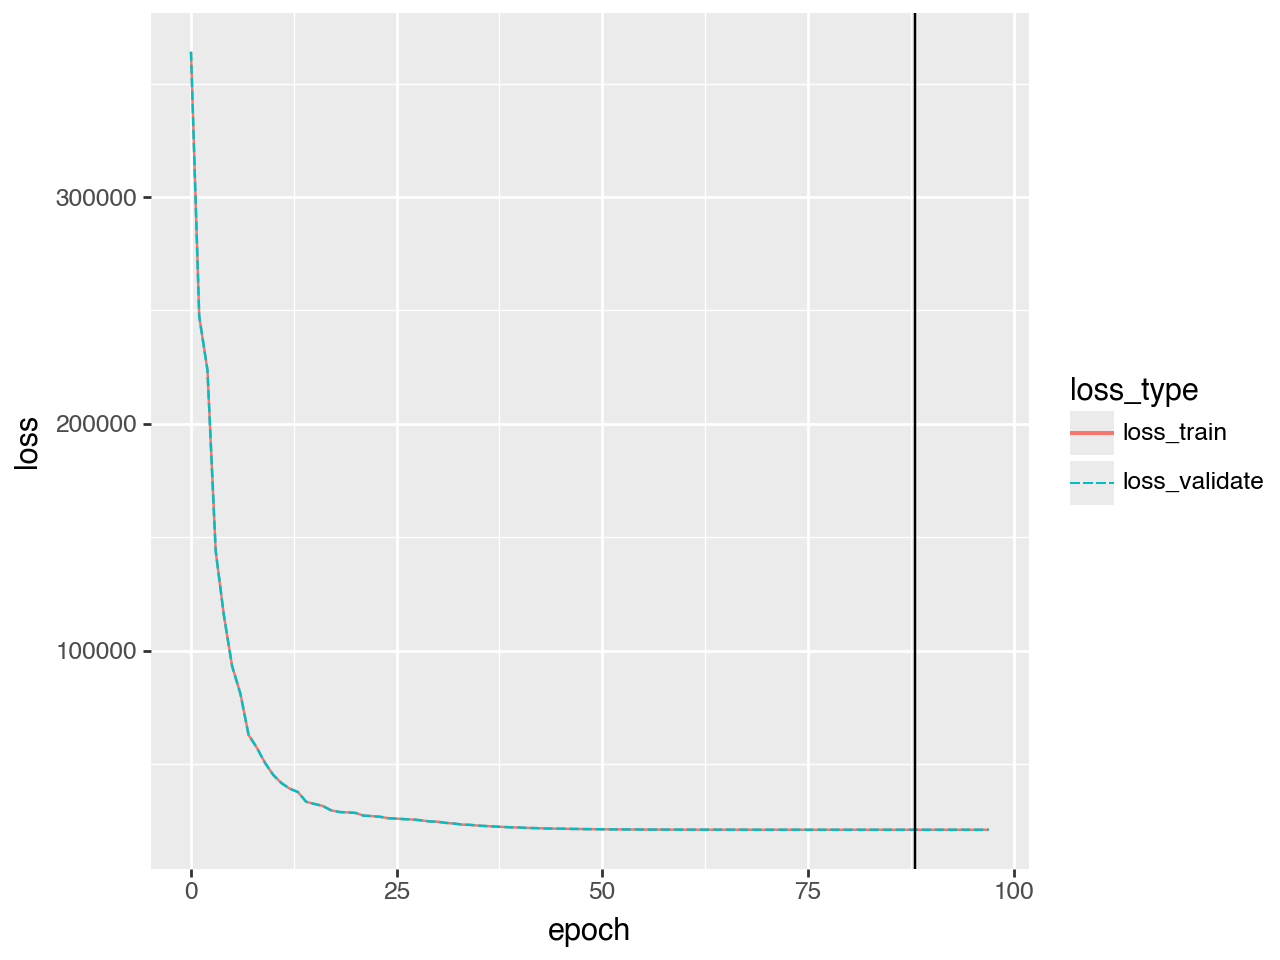

In [10]:
res.plot_loss()